This code is based on HW9 for CME 594 with Sybil Derrible from Spring 2017. 

Neural networks capture that idea that classification or regression might be more complicated than any function that we can come up with in a reasonable way. One of the difficulties is that variables may impact each other or have an effect in certain combinations. So, a neural network takes the data and applies a set of functions on each variable to get new function weighted combinations of the data. This process may be repeated with the new data. Then, functions are applied to the modified data to get a final output value.

In [42]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing #to normalize the values
from sklearn.model_selection import train_test_split #new for version 0.18 but seems to be out soon
import matplotlib.pyplot as plt

file_name = 'HW9_data'
input_data = pd.read_csv(file_name + '.csv', header=0)

list(input_data)
input_data.shape

(46, 11)

The first few steps will involve preparing the data. We will remove redundent data to avoid a prediction based on almost perfectly correlated data. Then, we will prepare split the variables into predictors and the desired output (final grade).  Then, we will normalize the inputs and split the data into training and testing sets. 

In [43]:
X=input_data.drop('Letter',axis=1)

In [44]:
X=X.drop('Name', axis=1 )
X=X.drop('Percentile', axis=1)
Y=X.Grade

In [45]:
X=preprocessing.normalize(X)


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=11)
sc=[]
ind=[]


There are a variety of options for training a neural network. One set of options are the activation functions, which decide how data moves from one layer of neaurons to the next. There is also the solver, which functions as the algorithm determining how the neural network updates. If the solver uses gradient descent, a learning rate must also be chosen, which determines how intensely the weights are updated each iteration. There is also an issue of how many nodes should be included. 

So, with all of this in hand, we can create a loop that tests all the variations for our data set using one type of neural network in python. Note that only one learning rate is used although there are other options. 




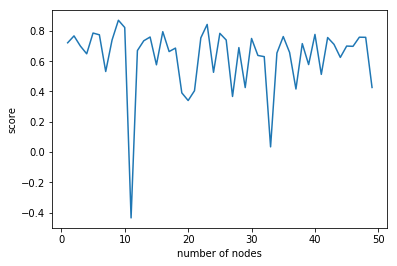

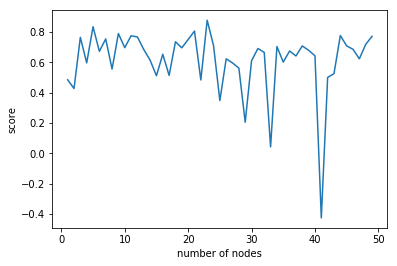

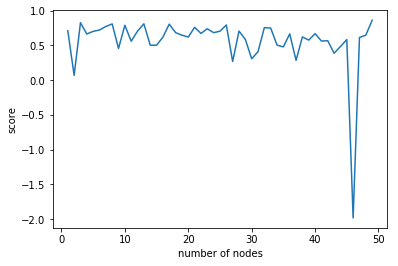

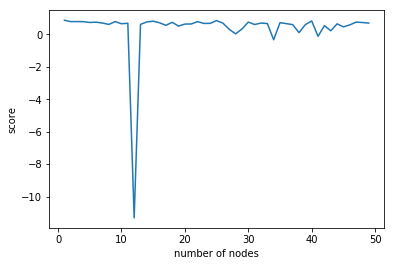

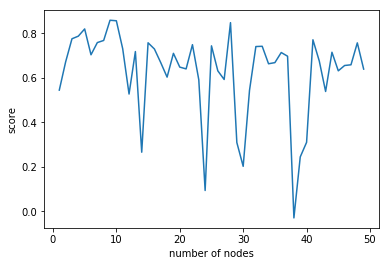

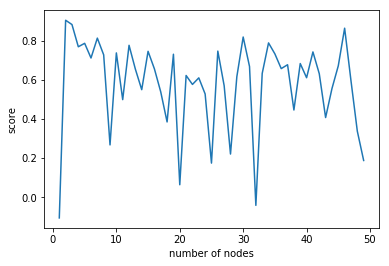

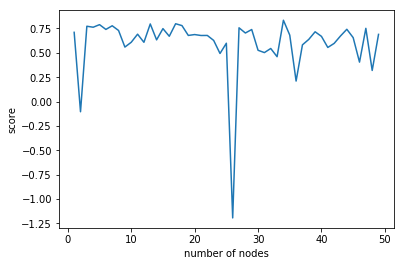

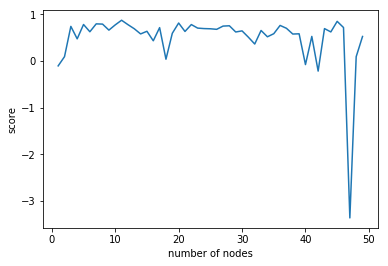

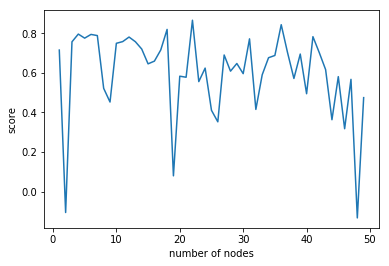

In [59]:
for i in range(0,3,1):
    for j in range(0,3,1):
        sc=[]
        ind=[]
        for k in range(1,50,1):
            acti = ['logistic', 'tanh', 'relu']
            algo = ['lbfgs', 'sgd', 'adam']
            neural = MLPRegressor(activation=acti[0], solver=algo[0], learning_rate = 'adaptive', hidden_layer_sizes=(k,)) 
            neural.fit(X_train, Y_train)
            neural_score = neural.score(X_test, Y_test)
            sc.append(neural_score)
            ind.append(k)
         
        plt.plot(ind,sc)
        plt.xlabel("number of nodes")
        plt.ylabel("score")
        plt.show()

We can see that the number of nodes seems to make a big difference in the R^2 statistics, but unfortunately not in any nice predictable way. Of all the models, the choices relu and lbfgs seem to give the most consistently good results. 

In general, I think we would expect to see better results than this for predicting something a simple as a final grade based on the grades already received in the class. In this case, I believe we're seeing a mismatch between data and method. Neural networks are complicated, and, as a result, require a large set of data for trining. I think this is trying to fit an overly complicated model to a simple and small data set with predictable poor results. 